In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import torch
import sys
from helpers_task_detector import *
sys.path.append('../')
from src.helpers import *
from src.visualize import *
from src.trainer import *
from src.trainer_hnet import * 
from Models.models import *

/home/nerea/anaconda3/envs/sinthlab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def create_task_map(data):
    found_ids = []
    max_id = 0
    true_task_map = {}
    for d in data.keys():
        new_id = d.split('_')[1]
        if new_id not in found_ids:
            found_ids.append(new_id)
            true_task_map[d] = max_id
            max_id += 1
        else:
            idx_id = found_ids.index(new_id)
            true_task_map[d] = idx_id
    return true_task_map

Experiments from 105 to 115 (from 1 to 50 trials)

In [3]:
exp_num_trials = {'Experiment94': 1, 
                  'Experiment95': 5,
                  'Experiment96': 10, 
                  'Experiment97': 15, 
                  'Experiment98': 20, 
                  'Experiment99': 25, 
                  'Experiment100': 30, 
                  'Experiment101': 35, 
                  'Experiment102': 40,
                  'Experiment103': 45, 
                  'Experiment104': 50,
                  'Experiment105': 1, 
                  'Experiment106': 5,
                  'Experiment107': 10, 
                  'Experiment108': 15, 
                  'Experiment109': 20, 
                  'Experiment110': 25, 
                  'Experiment111': 30, 
                  'Experiment112': 35, 
                  'Experiment113': 40,
                  'Experiment114': 45, 
                  'Experiment115': 50,
                  'Experiment116': 54,
                  'Experiment76' : 54,
                  

                #   'Experiment18': 54,
                #   'Experiment19': 1, 
                #   'Experiment20': 5,
                #   'Experiment21': 10, 
                #   'Experiment22': 15, 
                #   'Experiment23': 20, 
                #   'Experiment24': 25, 
                #   'Experiment25': 30, 
                #   'Experiment26': 35, 
                #   'Experiment27': 1, 
                #   'Experiment28': 5,
                #   'Experiment29': 10, 
                #   'Experiment30': 15, 
                #   'Experiment31': 20, 
                #   'Experiment32': 25, 
                #   'Experiment33': 30, 
                #   'Experiment34': 35, 
                #   'Experiment35': 40,
                #   'Experiment36': 45, 
                #   'Experiment37': 50,
                #   'Experiment38': 54, 
                #   'Experiment39': 1, 
                #   'Experiment40': 5,
                #   'Experiment41': 10, 
                #   'Experiment42': 15, 
                #   'Experiment43': 20, 
                #   'Experiment44': 25, 
                #   'Experiment45': 30, 
                #   'Experiment46': 35, 
                #   'Experiment47': 40,
                #   'Experiment48': 45, 
                #   'Experiment49': 50,
                #   'Experiment50': 54,
                  }

In [4]:
def create_table_results(experiment_name):
    dataset = []
    r2_test_detector = []
    r2_test_hnet = []
    y_true_detector = []
    y_pred_detector = []
    y_true_hnet = []
    y_pred_hnet = []
    predicted_task = []
    new_task = []
    true_task = []

    path_results = './Results/' + experiment_name
    
    with open(os.path.join(path_results +'.pkl'), 'rb') as fp:
        results = pickle.load(fp)
    
    num_trials = exp_num_trials[experiment_name]
    
    if experiment_name == 'Experiment76':
        data_path = './Data/Sim_Data_Experiment60_sorted.pkl'
    elif experiment_name == 'Experiment116':
        data_path = './Data/Sim_Data_Experiment61_-1trials.pkl'
    else:
        data_path = './Data/Sim_Data_Experiment61_'+ str(num_trials)+'trials.pkl'
        
    with open(os.path.join(data_path), 'rb') as fp:
        data = pickle.load(fp)
        
    true_task_map = create_task_map(data)
    
    for set in results.keys():
        dataset.append(set)
        r2_test_detector.append(results[set]['r2_test_detector'])
        r2_test_hnet.append(results[set]['r2_test_hnet'])
        predicted_task.append(results[set]['predicted_task'])
        new_task.append(results[set]['new_task'])
        true_task.append(true_task_map[set])
        if 'y_true_hnet' in results[set].keys():
            y_true_hnet.append([results[set]['y_true_hnet']])
            y_pred_hnet.append([results[set]['y_pred_hnet']])
        else:
            y_true_hnet.append([0])
            y_pred_hnet.append([0])
        if 'y_true_detector' in results[set].keys():
            y_true_detector.append([results[set]['y_true_detector']])
            y_pred_detector.append([results[set]['y_pred_detector']])
        else:
            y_true_detector.append([0])
            y_pred_detector.append([0])
        
    df = pd.DataFrame({'Dataset':dataset,
                   'True_Task': true_task,
                   'Predicted_Task' : predicted_task,
                   'New_Task': new_task, 
                    'Y_t_detector': y_true_detector,
                    'Y_p_detector':y_pred_detector,  
                    'R2_Detector':r2_test_detector,
                    'Y_t_hnet': y_true_hnet,
                    'Y_p_hnet':y_pred_hnet,  
                    'R2_hnet':r2_test_hnet}) 
    return df

In [5]:
def average_results():
    
    num_trials = []
    acc_detector = []
    r2_detector = []
    for exp in exp_num_trials.keys():
        df = create_table_results(exp)
        num_trials.append(exp_num_trials[exp])
        r2_detector.append(df.R2_Detector.mean())
        acc_detector.append((np.sum(df.True_Task == df.Predicted_Task)*10))
    df = pd.DataFrame({'Number Trials':num_trials,
                    'Accuracy Task Detector': acc_detector,
                    'R2 Task Detector' : r2_detector,
                    }) 
    df = df.sort_values(by = 'Number Trials')

    return df

In [6]:
df = average_results()

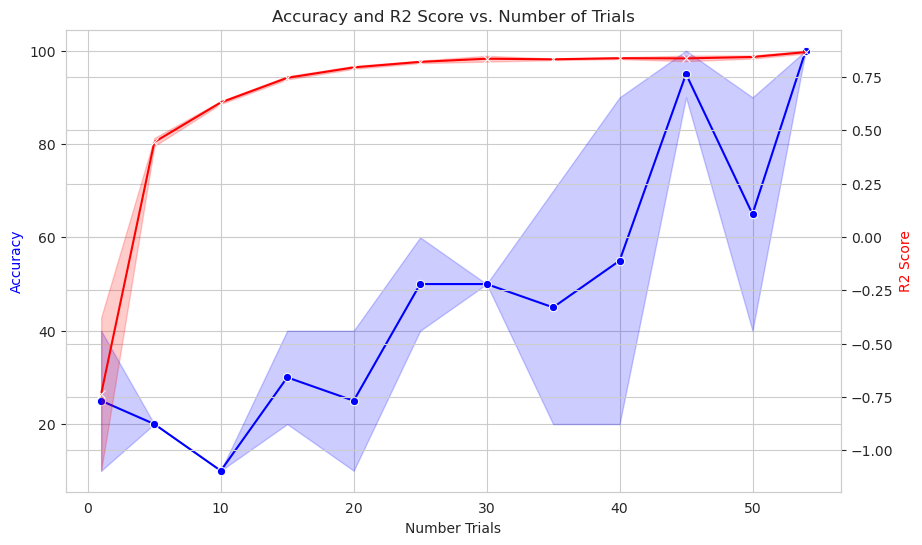

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the seaborn style
sns.set_style("whitegrid")

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the accuracy on the primary y-axis
sns.lineplot(data=df, x='Number Trials', y='Accuracy Task Detector', ax=ax1, marker='o', color='b')
ax1.set_ylabel('Accuracy', color='b')

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Number Trials', y='R2 Task Detector', ax=ax2, marker='x', color='r')
ax2.set_ylabel('R2 Score', color='r')

# Add title
plt.title('Accuracy and R2 Score vs. Number of Trials')

# Show plot
plt.show()


### Check here how many trials are needed for a task to be detected once it has been pre-trained.

In [8]:
path_to_hnets = './Models/Models_HNET'
experiment_name = 'Experiment76'
data_name = 'Experiment60_sorted'
data_path = './Data/Sim_Data_'+data_name+'.pkl'
with open(os.path.join(data_path), 'rb') as fp:
    data = pickle.load(fp)

In [9]:
data.keys()

dict_keys(['Data_0_1', 'Data_2_2', 'Data_4_1', 'Data_3_1', 'Data_1_2', 'Data_3_2', 'Data_4_2', 'Data_0_2', 'Data_1_1', 'Data_2_1'])

In [10]:
_,_,_,_,x_test_task2, y_test_task2 = data['Data_4_1']
_,_,_,_,x_test_task1, y_test_task1 = data['Data_2_2']
_,_,_,_,x_test_task4, y_test_task4 = data['Data_1_2']
_,_,_,_,x_test_task3, y_test_task3 = data['Data_3_1']
_,_,_,_,x_test_task0, y_test_task0 = data['Data_0_1']

In [11]:
X = [x_test_task0, x_test_task1, x_test_task2, x_test_task3, x_test_task4]
Y = [y_test_task0, y_test_task1, y_test_task2, y_test_task3, y_test_task4]
num_trials_ = [1,2,4,6,8,10,12,14,16,17]
path_to_detectors ='./Models/Models_Task_Recognition'
models_exp = np.sort(os.listdir(os.path.join(path_to_detectors, experiment_name)))
thrs = 0.8

task_ids = []
random_trials = []
r2_list = []
true_ids = []
num_trials = []

In [12]:
true_id = 0
for feats, targs in zip(X,Y):
    for n in num_trials_:
        for t in range(10):
            trials = random.sample(range(17),n)
            x, y = feats[trials, :,:], targs[trials, :,:]
            r2_task = []
            for m in (models_exp):
                model_i = torch.load(os.path.join(path_to_detectors,experiment_name, m))
                y_true_test, y_pred_test = reshape_to_eval(x,y, model_i)
                r2_task.append(r2_score(y_true_test,y_pred_test))
            max_r2 = max(r2_task)
            r2_list.append(max_r2)
            task_id = None
            if max_r2 > thrs:
                task_id = np.argmax(r2_task)
            task_ids.append(task_id)
            random_trials.append(t)
            num_trials.append(n)
            true_ids.append(true_id)
    true_id += 1

In [13]:
df_3 = pd.DataFrame({"Trial":random_trials, "Num Trials": num_trials, 
                     "True Task": true_ids, 
                    "Predicted Task" : task_ids,
                     "R2":r2_list })

In [14]:
df_3

,Trial,Num Trials,True Task,Predicted Task,R2
0,0,1,0,0.0,0.821788
1,1,1,0,0.0,0.868539
2,2,1,0,NaN,0.578918
3,3,1,0,0.0,0.813922
4,4,1,0,0.0,0.863696
...,...,...,...,...,...
495,5,17,4,4.0,0.890006
496,6,17,4,4.0,0.890006
497,7,17,4,4.0,0.890006
498,8,17,4,4.0,0.890006


In [15]:
accuracy_by_num_trials = df_3.groupby(['Num Trials', 'True Task']).apply(lambda group: (group['True Task'] == group['Predicted Task']).mean())
accuracy_by_num_trials.name = 'Accuracy'

In [16]:
df_4 = pd.DataFrame(accuracy_by_num_trials.reset_index())

In [17]:
df_3 = df_3.merge(df_4, on = ['Num Trials', 'True Task'])

In [18]:
df_3.columns

Index(['Trial', 'Num Trials', 'True Task', 'Predicted Task', 'R2', 'Accuracy'], dtype='object')

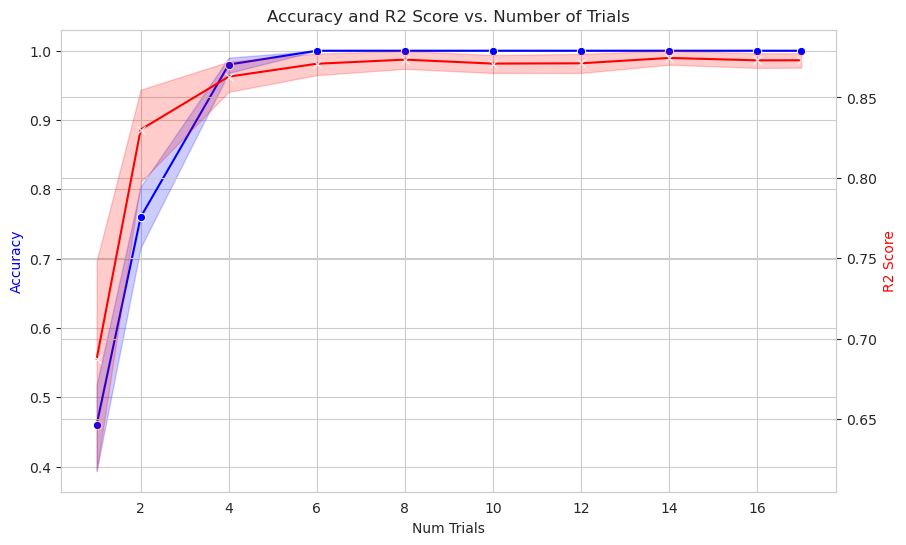

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the seaborn style
sns.set_style("whitegrid")

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the accuracy on the primary y-axis
sns.lineplot(data=df_3, x='Num Trials', y='Accuracy', ax=ax1, marker='o', color='b')
ax1.set_ylabel('Accuracy', color='b')

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df_3, x='Num Trials', y='R2', ax=ax2, marker='x', color='r')
ax2.set_ylabel('R2 Score', color='r')

# Add title
plt.title('Accuracy and R2 Score vs. Number of Trials')
#plt.ylim([0.5,1])

# Show plot
plt.show()